In [416]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Improting last 5 years survey data

In [417]:
data_frames = []

data_paths = [
  'dataset/2017.csv',
  'dataset/2018.csv',
  'dataset/2019.csv',
  'dataset/2020.csv',
  'dataset/2021.csv', 
]

col_renames = {
    'Overall, how much importance does your employer place on physical health?':'physical_health_importance',
    'Overall, how much importance does your employer place on mental health?':'mental_health_importance',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'mental_health_support',
    '*Are you self-employed?*': 'self_employed',
    '<strong>Are you self-employed?</strong>': 'self_employed', 
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_related_role', 
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'workplace_resources',
    'Have you ever discussed your mental health with your employer?': 'mh_employer_discussion',
    'Have you ever discussed your mental health with coworkers?': 'mh_coworker_discussion',
    'Do you currently have a mental health disorder?': 'current_mental_health_issue',
    'Do you *currently* have a mental health disorder?': 'current_mental_health_issue',
    'Do you *currently* have a mental health disorder?': 'current_mental_health_issue',
    'How willing would you be to share with friends and family that you have a mental illness?': 'mh_share',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you *live* in?': 'country',
    'What country do you <strong>live</strong> in?': 'country',
    'Does your employer provide mental health benefits as part of healthcare coverage?	': 'benefits',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'treatment for a mental health',
    'Do you have a family history of mental illness?':'family history of mental illness'
}

col_to_keep = col_renames.keys()


In [418]:
for path in data_paths:
  print("\nReading file: ", path)
  df = pd.read_csv(path)
  print('Shape - default: ', df.shape)

  #We have a lot of columns and many with a lot of missing values. let's filter those columns and keep only those who have less than 90% missing values.
  max_na_filter = (0.9 * len(df))
  df = df.loc[:,(df.isnull().sum(axis = 0) <= max_na_filter)]
  print('Shape - filtered: ', df.shape)
  # Removing not needed columns
  col_to_drop = [item for item in df.columns if item not in col_to_keep]
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  print('Shape - column filtered: ', df.shape)

  # Renaming columns
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  df.rename(columns = col_renames, inplace = True, errors = 'ignore') 

  # Storing data frames in list
  data_frames.append(df)


Reading file:  dataset/2017.csv
Shape - default:  (756, 123)
Shape - filtered:  (756, 84)
Shape - column filtered:  (756, 17)

Reading file:  dataset/2018.csv
Shape - default:  (417, 123)
Shape - filtered:  (417, 84)
Shape - column filtered:  (417, 17)

Reading file:  dataset/2019.csv
Shape - default:  (352, 82)
Shape - filtered:  (352, 78)
Shape - column filtered:  (352, 17)

Reading file:  dataset/2020.csv
Shape - default:  (180, 120)
Shape - filtered:  (180, 81)
Shape - column filtered:  (180, 17)

Reading file:  dataset/2021.csv
Shape - default:  (131, 124)
Shape - filtered:  (131, 83)
Shape - column filtered:  (131, 17)


In [419]:
data_df = pd.concat(data_frames, ignore_index = True)
print('Shape - combined data: ', data_df.shape)

Shape - combined data:  (1836, 17)


In [420]:
data_df.head(10)

,self_employed,tech_company,tech_related_role,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,physical_health_importance,mental_health_importance,current_mental_health_issue,treatment for a mental health,family history of mental illness,mh_share,mental_health_support,age,gender,country
0,0,1.0,1.0,No,I don't know,0.0,1.0,6.0,0.0,Possibly,1,No,5,1.0,27.0,Female,United Kingdom
1,0,1.0,1.0,Yes,No,0.0,1.0,7.0,2.0,Possibly,0,No,4,2.0,31.0,male,United Kingdom
2,0,1.0,1.0,I don't know,No,1.0,1.0,0.0,1.0,Yes,1,Yes,5,1.0,36.0,male,United States of America
3,0,1.0,1.0,Yes,I don't know,1.0,1.0,7.0,5.0,Yes,1,I don't know,10,2.0,22.0,Male,United States of America
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Yes,10,1.0,52.0,female,United States of America
5,0,1.0,0.0,Yes,I don't know,0.0,0.0,9.0,5.0,No,0,Yes,5,2.0,30.0,male,United States of America
6,0,1.0,1.0,Yes,No,0.0,1.0,10.0,10.0,Yes,1,Yes,8,2.0,36.0,F,United States of America
7,0,1.0,1.0,Yes,No,0.0,0.0,10.0,8.0,No,1,Yes,3,2.0,38.0,Female,United States of America
8,0,0.0,1.0,I don't know,No,0.0,0.0,9.0,7.0,Don't Know,0,I don't know,6,2.0,35.0,Male,Switzerland
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Possibly,1,No,4,3.0,36.0,male,India


### Data Cleaning

In [421]:
# lets check number of empty rows in data
data_df.isna().sum().sort_values()

self_employed                         0
mh_share                              0
family history of mental illness      0
treatment for a mental health         0
current_mental_health_issue           0
age                                   2
mental_health_support                 2
country                               2
gender                               28
mh_employer_discussion              259
workplace_resources                 259
benefits                            259
tech_related_role                   259
tech_company                        259
physical_health_importance          259
mental_health_importance            259
mh_coworker_discussion              264
dtype: int64

#### current_mental_health_issue

In [422]:
data_df['current_mental_health_issue'].value_counts()

current_mental_health_issue
Yes           756
No            546
Possibly      372
Don't Know    162
Name: count, dtype: int64

##### tech_related_role

In [423]:
# Since we are targetting tech related employees, setting default input values will make incorrect analysis, hence removing the empty value rows 
data_df = data_df[data_df['tech_related_role'].notna()]

In [424]:
# Lets see the values in our interested column
data_df['tech_related_role'].value_counts()

tech_related_role
1.0    1463
0.0     114
Name: count, dtype: int64

In [425]:
len(data_df)

1577

In [426]:
data_df.isna().sum().sort_values()

self_employed                        0
age                                  0
mental_health_support                0
mh_share                             0
family history of mental illness     0
treatment for a mental health        0
current_mental_health_issue          0
mental_health_importance             0
mh_employer_discussion               0
workplace_resources                  0
benefits                             0
tech_related_role                    0
tech_company                         0
physical_health_importance           0
country                              0
mh_coworker_discussion               5
gender                              17
dtype: int64

In [427]:
len(data_df)

1577

##### gender

In [428]:
data_df['gender'].isna().sum()

17

In [429]:
# Just 25 records with missing gender values, instead of removing, lets mark those as others.
data_df['gender'] = data_df['gender'].fillna('Other')

# format the records
data_df['gender'] = data_df['gender'].str.lower().str.strip()

In [430]:
# Lets see the values in our interested column
data_df['gender'].value_counts()

gender
male                         878
female                       387
m                             99
f                             62
woman                         20
                            ... 
transgender                    1
female/gender non-binary.      1
cisgendered woman              1
trans woman                    1
non-binary/agender             1
Name: count, Length: 78, dtype: int64

In [431]:
# a lot of inconsistent records exists in our gender, lets break all these in our required groups.

gender_male = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male']
gender_female = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female']
gender_other = ['agender', 'nonbinary', '43','cis-het male','non-binary and gender fluid','nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer', 'homem cis']

# lets transfor gender in simpler form
data_df['gender'] = data_df['gender'].replace(gender_male, 'Male')
data_df['gender'] = data_df['gender'].replace(gender_female, 'Female')
data_df['gender'] = data_df['gender'].replace(gender_other, 'Other')

# lets check records now




<>:5: SyntaxWarning: invalid escape sequence '\-'
<>:5: SyntaxWarning: invalid escape sequence '\-'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\2951300131.py:5: SyntaxWarning: invalid escape sequence '\-'
  gender_other = ['agender', 'nonbinary', '43','cis-het male','non-binary and gender fluid','nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer', 'homem cis']


In [432]:
data_df['gender'].value_counts()

gender
Male      1013
Female     496
Other       68
Name: count, dtype: int64

#### benefits

In [433]:
# lets check number of empty rows in data again
data_df.isna().sum().sort_values()

self_employed                       0
age                                 0
mental_health_support               0
mh_share                            0
family history of mental illness    0
treatment for a mental health       0
current_mental_health_issue         0
gender                              0
mental_health_importance            0
mh_employer_discussion              0
workplace_resources                 0
benefits                            0
tech_related_role                   0
tech_company                        0
physical_health_importance          0
country                             0
mh_coworker_discussion              5
dtype: int64

In [434]:
# we dont have any missing rows now, lets first see what are different values present
data_df['benefits'].value_counts()

benefits
Yes                               854
I don't know                      416
No                                233
Not eligible for coverage / NA     74
Name: count, dtype: int64

In [435]:
# Not eligible for coverage / NA is same as No. Lets update
data_df.loc[data_df['benefits'] == 'Not eligible for coverage / NA' , 'benefits'] = 'No'

data_df['benefits'].value_counts()

benefits
Yes             854
I don't know    416
No              307
Name: count, dtype: int64

#### workplace_resources

In [436]:
data_df['workplace_resources'].isna().sum()

0

In [437]:
len(data_df)

1577

No ambiguity in `workplace_resources` column.

#### mh_employer_discussion

In [438]:
data_df['mh_employer_discussion'].value_counts()

mh_employer_discussion
0.0    1087
1.0     490
Name: count, dtype: int64

#### mh_coworker_discussion

In [439]:
data_df['mh_coworker_discussion'].value_counts()

mh_coworker_discussion
0.0    879
1.0    693
Name: count, dtype: int64

#### physical_health_importance

In [440]:
data_df['physical_health_importance'].isna().sum()

0

In [441]:
data_df['physical_health_importance'].describe()

count    1577.000000
mean        6.317058
std         2.279832
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: physical_health_importance, dtype: float64

#### treatment for a mental health

In [442]:
data_df['treatment for a mental health'].value_counts()

treatment for a mental health
1    933
0    644
Name: count, dtype: int64

#### family history of mental illness

In [443]:
data_df['family history of mental illness'].value_counts()

family history of mental illness
Yes             712
No              502
I don't know    363
Name: count, dtype: int64

#### mental_health_importance

In [444]:
data_df['mental_health_importance'].describe()

count    1577.000000
mean        5.027901
std         2.500859
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: mental_health_importance, dtype: float64

#### age

In [445]:
# lets see what values we have
data_df['age'].describe()

count    1577.000000
mean       34.547876
std         9.536486
min         0.000000
25%        28.000000
50%        33.000000
75%        40.000000
max       223.000000
Name: age, dtype: float64

In [446]:
# We can see irregularites in age, lets try to address these

# Get mean age
mean_age = data_df[(data_df["age"] >= 18) | (data_df["age"] <= 75)]["age"].mean()

# Replace irregular age numbers with mean value
data_df["age"].replace(to_replace = data_df[(data_df["age"] < 18) | (data_df["age"] > 75)]["age"].tolist(), value = mean_age, inplace = True)

data_df['age'].describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\1382249732.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["age"].replace(to_replace = data_df[(data_df["age"] < 18) | (data_df["age"] > 75)]["age"].tolist(), value = mean_age, inplace = True)


count    1577.000000
mean       34.450283
std         8.224555
min        18.000000
25%        28.000000
50%        33.000000
75%        40.000000
max        66.000000
Name: age, dtype: float64

### Feature engineering

Lets do some feature reduction including re formating the values.
- self_employed: From 0/1 to No/Yes
- tech_company: From 0.0/1.0 to No/Yes
- seek_help: From 0/1 to No/Yes
- no_employees: 'More than 1000' to '>1000'
- mh_employer_discussion: From 0.0/1.0 to No/Yes
- mh_coworker_discussion: From 0.0/1.0 to No/Yes

In [447]:
data_df['self_employed'] = data_df['self_employed'].replace({1 : 'Yes' , 0 : 'No'})
data_df['tech_company'] = data_df['tech_company'].replace({1.0 : 'Yes' , 0.0 : 'No'})
data_df['mh_employer_discussion'] = data_df['mh_employer_discussion'].replace({1.0 : 'Yes' , 0.0 : 'No'})
data_df['mh_coworker_discussion'] = data_df['mh_coworker_discussion'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [448]:
# Lets see our unique data types
data_df.nunique()

self_employed                        1
tech_company                         2
tech_related_role                    2
benefits                             3
workplace_resources                  3
mh_employer_discussion               2
mh_coworker_discussion               2
physical_health_importance          11
mental_health_importance            11
current_mental_health_issue          4
treatment for a mental health        2
family history of mental illness     3
mh_share                            11
mental_health_support                5
age                                 50
gender                               3
country                             65
dtype: int64

In [449]:
# We can see we only have 1 unique in self_employed, lets see what it is.
data_df['self_employed'].unique()

array(['No'], dtype=object)

In [450]:
# So in our data, it can be observed that none of the respondents is self employed, so no need to keep this column. Lets drop this column.
data_df.drop(columns = 'self_employed', inplace = True)

In [451]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 0 to 1835
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tech_company                      1577 non-null   object 
 1   tech_related_role                 1577 non-null   object 
 2   benefits                          1577 non-null   object 
 3   workplace_resources               1577 non-null   object 
 4   mh_employer_discussion            1577 non-null   object 
 5   mh_coworker_discussion            1572 non-null   object 
 6   physical_health_importance        1577 non-null   float64
 7   mental_health_importance          1577 non-null   float64
 8   current_mental_health_issue       1577 non-null   object 
 9   treatment for a mental health     1577 non-null   int64  
 10  family history of mental illness  1577 non-null   object 
 11  mh_share                          1577 non-null   int64  
 12  mental_heal

### Data Analysis / Visualization

In [452]:
colors = sns.color_palette('pastel')[0:5]

#### age

In [453]:
data_df['age'].describe()

count    1577.000000
mean       34.450283
std         8.224555
min        18.000000
25%        28.000000
50%        33.000000
75%        40.000000
max        66.000000
Name: age, dtype: float64

<Axes: ylabel='Proportions of Gender in tech industry'>

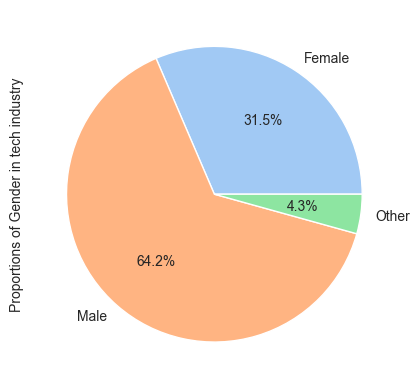

In [454]:
# Proportions of Gender in tech industry
data_df.groupby(['gender']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Proportions of Gender in tech industry', colors = colors)

In [455]:
data_df['gender'].value_counts()

gender
Male      1013
Female     496
Other       68
Name: count, dtype: int64

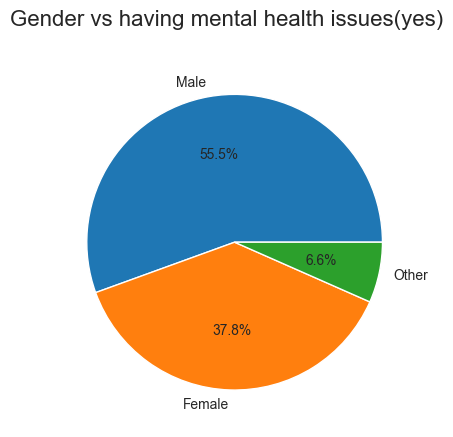

In [456]:


male_with_mental_health = data_df[(data_df["current_mental_health_issue"] == 'Yes') & (data_df["gender"] == 'Male')]
female_with_mental_health = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Female')]
other_with_mental_health = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Other')]

sizes = [
    male_with_mental_health['gender'].value_counts().values[0],
    female_with_mental_health['gender'].value_counts().values[0],
    other_with_mental_health['gender'].value_counts().values[0],
]
labels = ['Male', 'Female', 'Other']

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender vs having mental health issues(yes)', fontsize=16)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


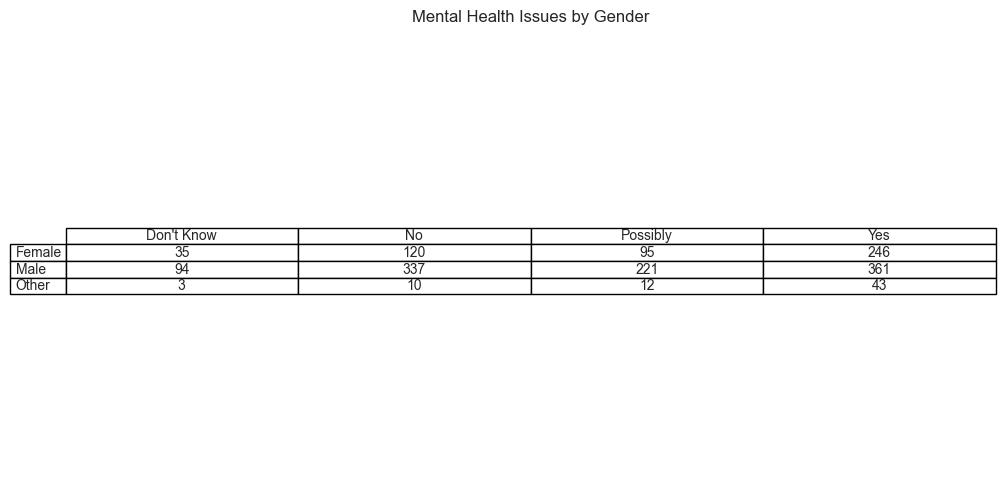

In [457]:
result = data_df.groupby('gender')['current_mental_health_issue'].value_counts().unstack(fill_value=0)

# Plot the table
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=result.values, 
                 colLabels=result.columns, 
                 rowLabels=result.index, 
                 cellLoc='center', 
                 loc='center')

# Add a title and labels
plt.title('Mental Health Issues by Gender')
# ax.text(0.5, -0.1, 'Gender', transform=ax.transAxes, ha='center', va='center', fontsize=12)
# ax.text(-0.1, 0.5, 'Mental Health Issue', transform=ax.transAxes, ha='center', va='center', rotation='vertical', fontsize=12)

plt.show()


Following observations can be derived from above.

- Around 60% of male employes have mental health issues while 35% female are effected with mental illness. 

#### Mental health distribution by age and gender

In [458]:
data_df['current_mental_health_issue'].value_counts()

current_mental_health_issue
Yes           650
No            467
Possibly      328
Don't Know    132
Name: count, dtype: int64

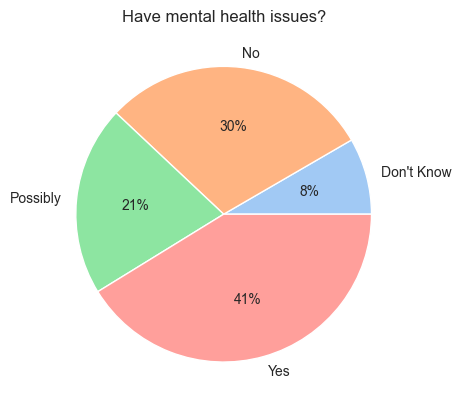

In [459]:
data_df.groupby(['current_mental_health_issue']).size().plot(kind='pie', autopct='%1.0f%%', label='Have mental health issues?', colors = colors)
plt.title('Have mental health issues?')
plt.ylabel('')  # This removes the default ylabel generated by pandas
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\557216257.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\557216257.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\557216257.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\557216257.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21208\557216257.py:14: UserWarning: set_ticklabel

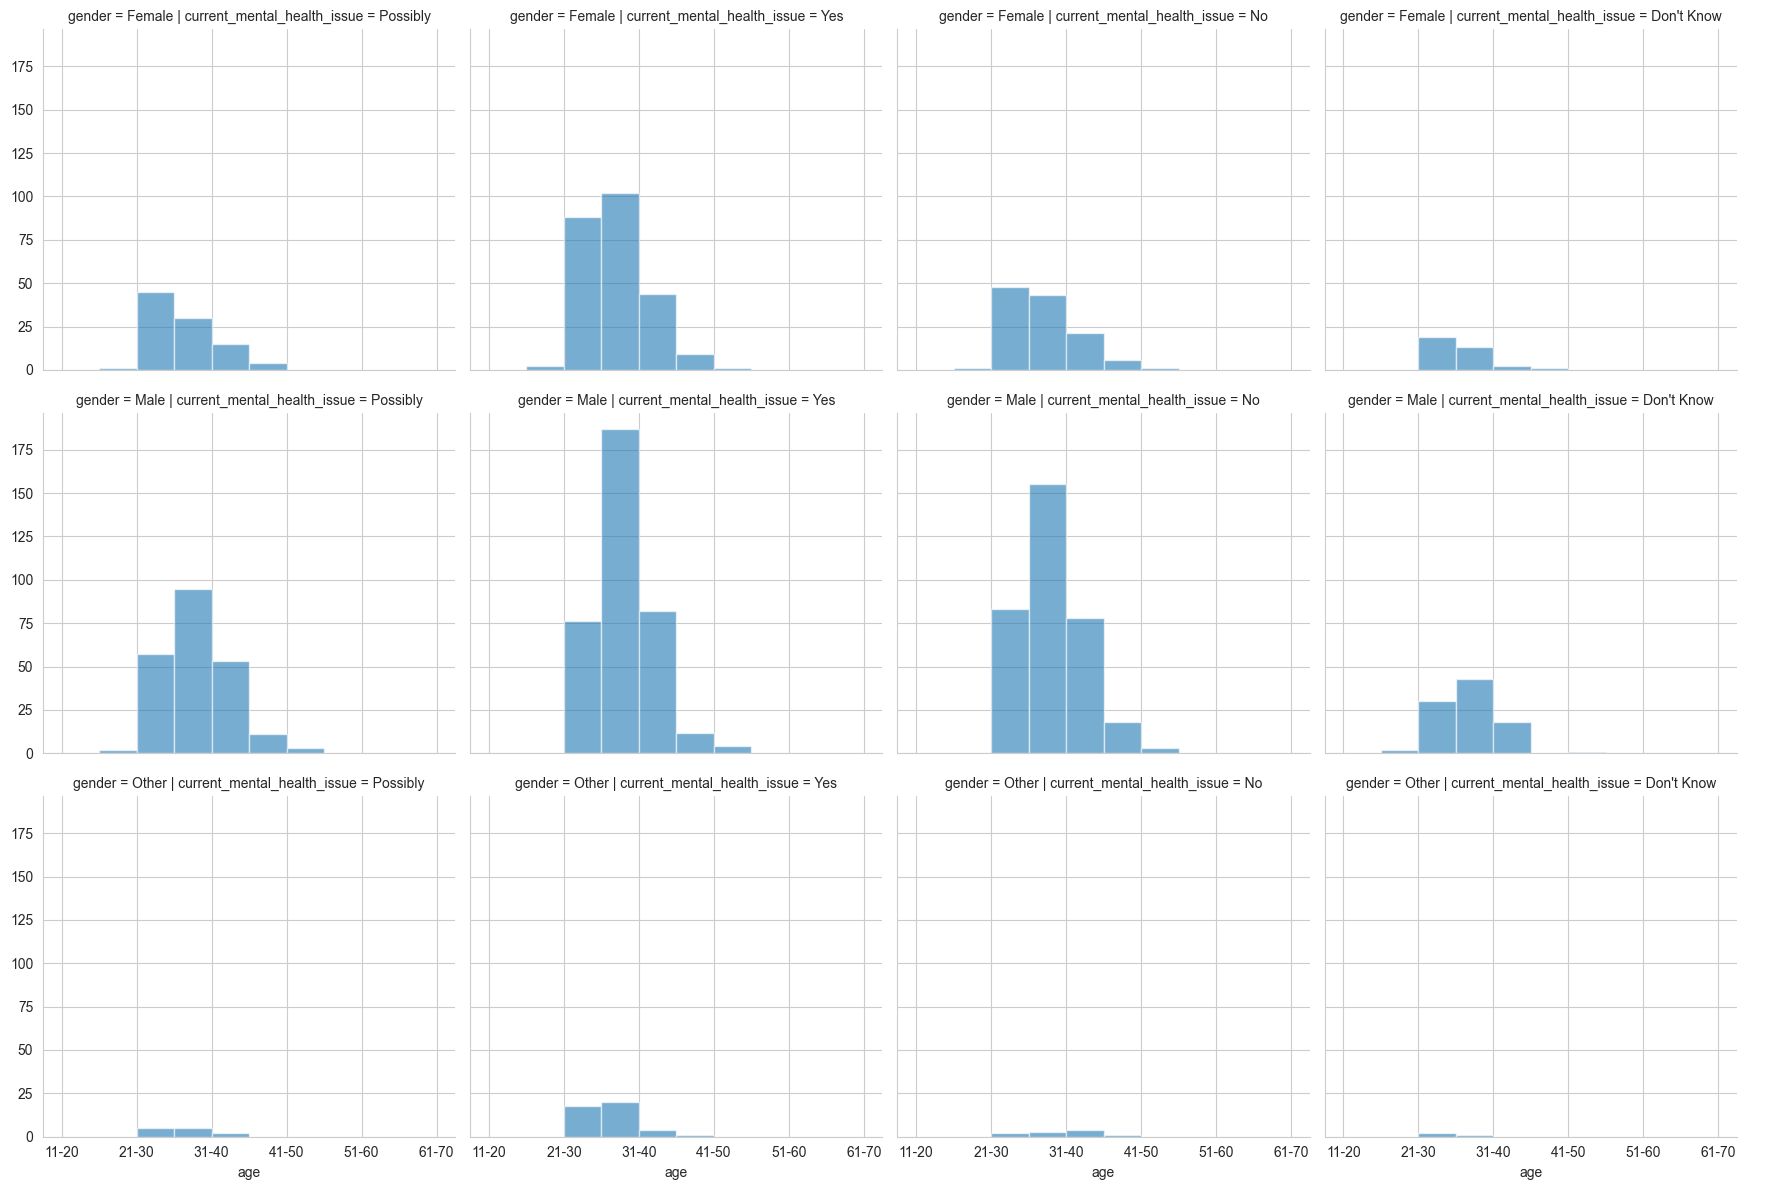

In [460]:
# It can be seen as mostly say Yes and mostly are Men in their 30s in our data. So lets plot them together to further analyze

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create the FacetGrid with adjusted aspect ratio
g = sns.FacetGrid(data_df, row='gender', col='current_mental_health_issue', height=4, aspect=1.1)

# Map the histogram
g.map(plt.hist, 'age', bins=age_bins, alpha=0.6)

# Set the x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(age_labels)

# Add legend
g.add_legend()

# Show the plot
plt.show()

Following observations can be derived from above.

- Most Men in their 30s in our data have Mental health issues.
- More female employees have mental health disorders than those who don't. 
- Mostly employees whose gender falls under 'Others' catgory hav less to no mental health issues.
- 67% of employees are effected with mental illness overall.



#### Are companies taking Mental Health issues seriously?


<Axes: ylabel='MH Coverage Provided? '>

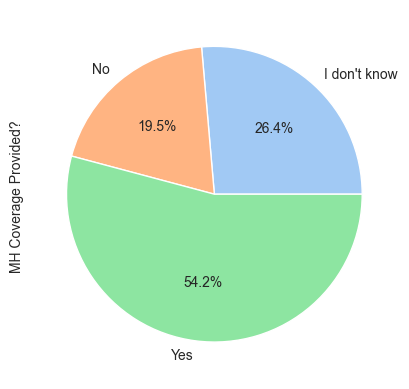

In [461]:
data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Coverage Provided? ', colors = colors)

<Axes: ylabel='MH Resources Provided? '>

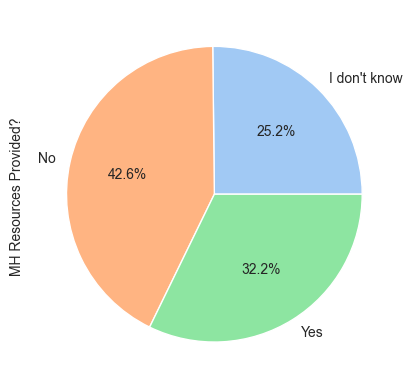

In [462]:
data_df.groupby(['workplace_resources']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Resources Provided? ', colors = colors)

Following observations can be derived from above.

- More than 60% employee have medical coverage provided from employer, but not the resources to get more information, suggesting that companies do not get active involvement.
- Around 12% employee do not have medical coverage.

#### How easy is discussing Mental Health at Work?


<Axes: ylabel='Discuss MH with Employer? '>

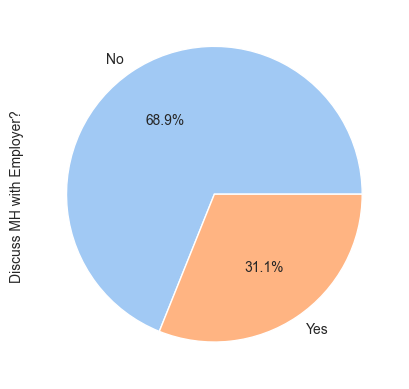

In [463]:
data_df.groupby(['mh_employer_discussion']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Employer? ', colors = colors)

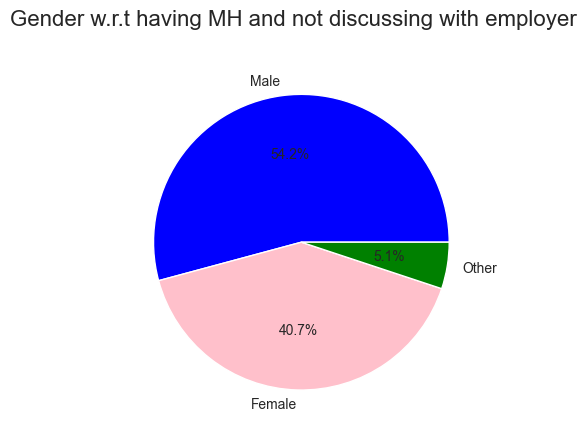

In [464]:


# Filter the data
male_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] == 'Yes') & (data_df["gender"] == 'Male') & (data_df["mh_employer_discussion"] == 'No')]
female_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Female') & (data_df["mh_employer_discussion"] == 'No')]
other_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Other') & (data_df["mh_employer_discussion"] == 'No')]

# Create the sizes array with the counts
sizes = [
    male_has_mh_and_not_discussed.shape[0],
    female_has_mh_and_not_discussed.shape[0],
    other_has_mh_and_not_discussed.shape[0],
]

# Ensure sizes is a 1D array
sizes = [size for size in sizes]

labels = ['Male', 'Female', 'Other']
colors = ['blue', 'pink', 'green']  # Define colors if needed

# Plot the pie chart
fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and not discussing with employer', fontsize=16)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()


<Axes: ylabel='Discuss MH with Co-workers?? '>

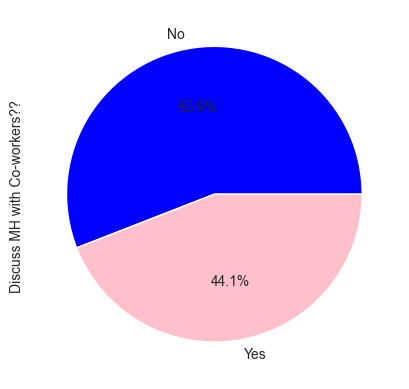

In [465]:
data_df.groupby(['mh_coworker_discussion']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Co-workers?? ', colors = colors)

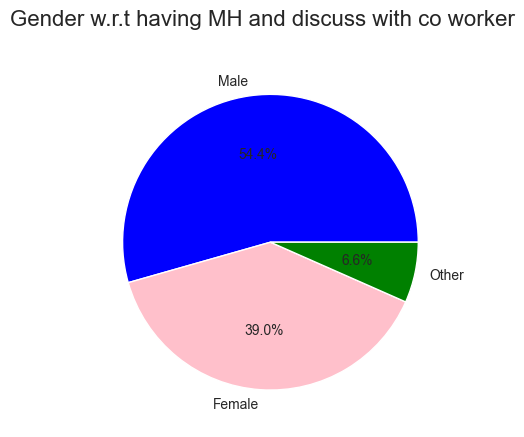

In [466]:


# Filter the data
male_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] == 'Yes') & (data_df["gender"] == 'Male') & (data_df["mh_coworker_discussion"] == 'Yes')]
female_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Female') & (data_df["mh_coworker_discussion"] == 'Yes')]
other_has_mh_and_not_discussed = data_df[(data_df["current_mental_health_issue"] =='Yes') & (data_df["gender"] == 'Other') & (data_df["mh_coworker_discussion"] == 'Yes')]

# Create the sizes array with the counts
sizes = [
    male_has_mh_and_not_discussed.shape[0],
    female_has_mh_and_not_discussed.shape[0],
    other_has_mh_and_not_discussed.shape[0],
]

# Ensure sizes is a 1D array
sizes = [size for size in sizes]

labels = ['Male', 'Female', 'Other']
colors = ['blue', 'pink', 'green']  # Define colors if needed

# Plot the pie chart
fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and discuss with co worker', fontsize=16)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()


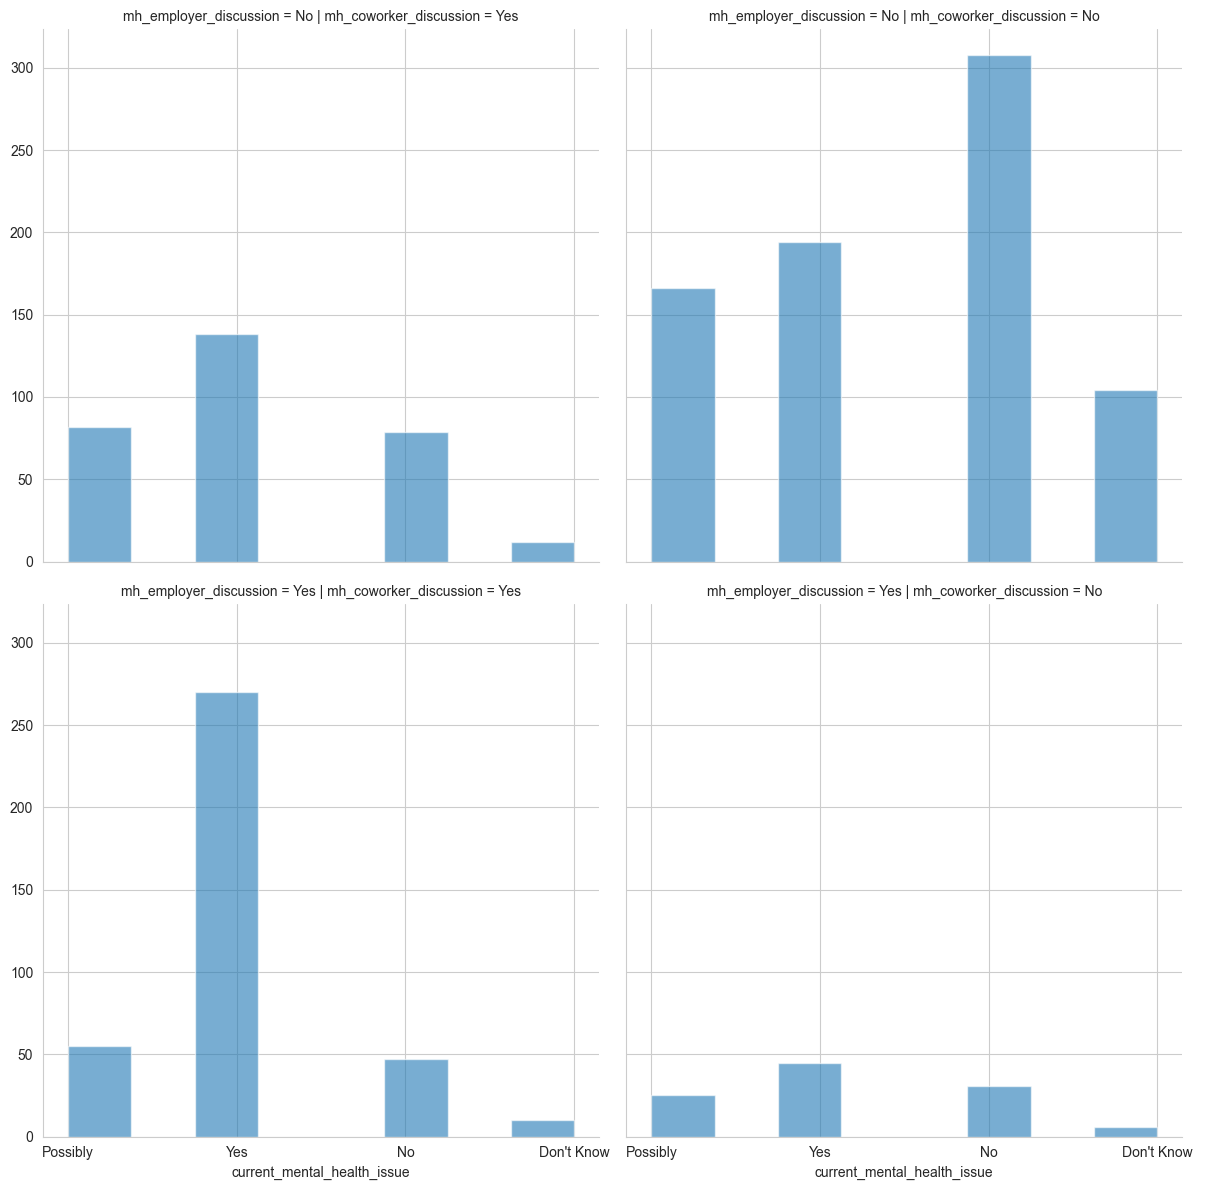

In [467]:
g = sns.FacetGrid(data_df, row = 'mh_employer_discussion', col = 'mh_coworker_discussion', height = 6)
g.map(plt.hist, 'current_mental_health_issue', bins = 8, alpha = 0.6)
g.add_legend()
plt.show()


Following observations can be derived from above.

- Overall 67% feel difficult to discuss the MH issues with employer, hence never discussed.

- Out of those, around 60% male who have active mental health issues have not discussed with their current employer.

- More than half (50%) males who have mental health issues have discussed with their co-workes.

- Almost all who have MH and discussed with employer have openly discuss with co workers, while there are a lot of those who have not discuss with employer but have discussd with co worker, suggesting they ar affraid of negative consequences.

#### How easy is to discuss openly about Mental Health with friends/family ?

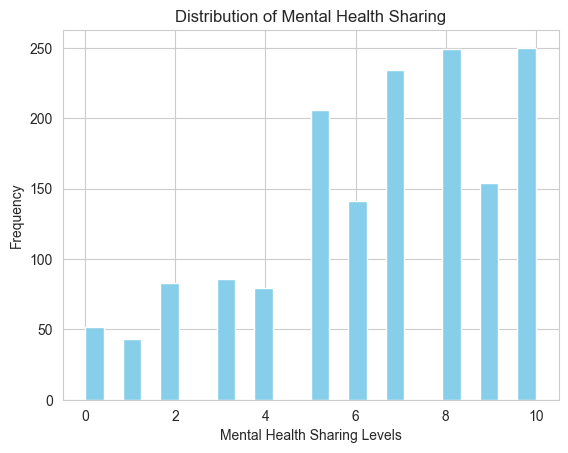

In [468]:
plt.hist(data_df['mh_share'], bins=24, color='skyblue')
plt.title('Distribution of Mental Health Sharing')
plt.xlabel('Mental Health Sharing Levels')
plt.ylabel('Frequency')
plt.show()

In [469]:
summary_stats = data_df['mh_share'].describe()

# Extract desired statistics
statistics = {
    'Mean': summary_stats['mean'],
    'Median': data_df['mh_share'].median(),
    'Std Dev': summary_stats['std'],
    'Min': summary_stats['min'],
    '25%': summary_stats['25%'],
    '50%': summary_stats['50%'],
    '75%': summary_stats['75%'],
    'Max': summary_stats['max']
}

# Print the summary statistics as a table
print("Summary Statistics for mh_share:")
print(pd.DataFrame(list(statistics.items()), columns=['Metric', 'Value']))

Summary Statistics for mh_share:
    Metric      Value
0     Mean   6.452124
1   Median   7.000000
2  Std Dev   2.743779
3      Min   0.000000
4      25%   5.000000
5      50%   7.000000
6      75%   9.000000
7      Max  10.000000


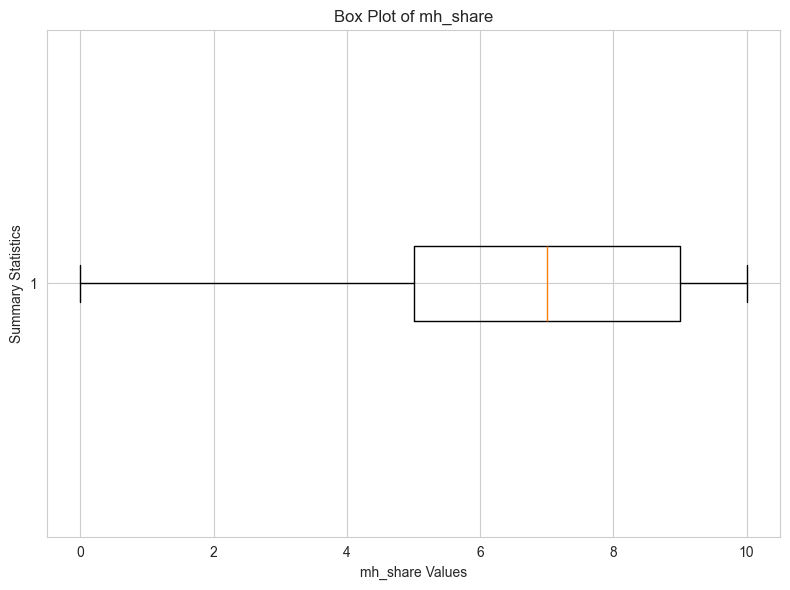

In [470]:
summary_stats = data_df['mh_share'].describe()

# Extract desired statistics
statistics = {
    'Mean': summary_stats['mean'],
    'Median': data_df['mh_share'].median(),
    'Std Dev': summary_stats['std'],
    'Min': summary_stats['min'],
    '25%': summary_stats['25%'],
    '50%': summary_stats['50%'],
    '75%': summary_stats['75%'],
    'Max': summary_stats['max']
}

# Create a box plot based on the summary statistics
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['mh_share'], vert=False)
plt.title('Box Plot of mh_share')
plt.xticks(rotation=0)
plt.xlabel('mh_share Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.tight_layout()
plt.show()

Following observations can be derived from above.

- More than half of the respondents share or tends to share MH illness with their family and friends.

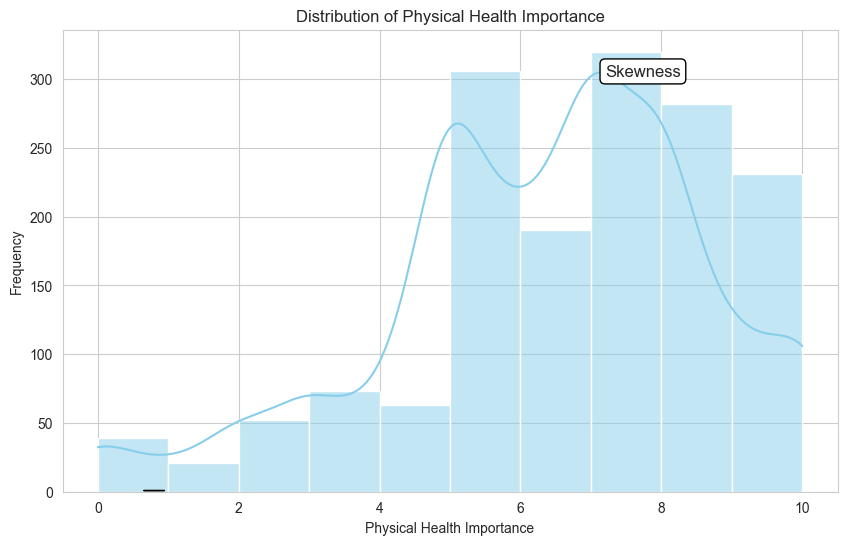

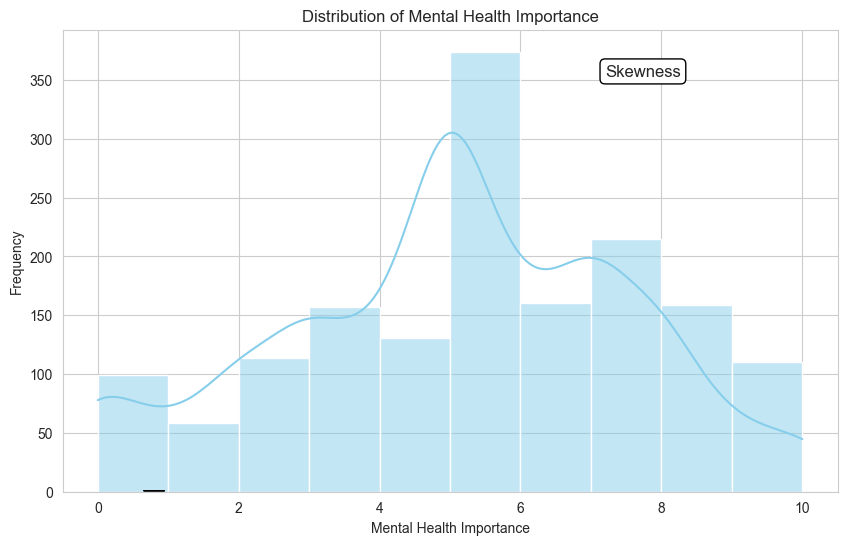

In [471]:
# Plot histogram for physical health importance
plt.figure(figsize=(10, 6))
sns.histplot(data_df['physical_health_importance'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Physical Health Importance')
plt.xlabel('Physical Health Importance')
plt.ylabel('Frequency')

# Add skewness indication
plt.text(0.7, 0.9, 'Skewness', transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.arrow(0.65, 0.85, 0.2, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')

plt.show()

# Plot histogram for mental health importance
plt.figure(figsize=(10, 6))
sns.histplot(data_df['mental_health_importance'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Mental Health Importance')
plt.xlabel('Mental Health Importance')
plt.ylabel('Frequency')

# Add skewness indication
plt.text(0.7, 0.9, 'Skewness', transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.arrow(0.65, 0.85, 0.2, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')

plt.show()

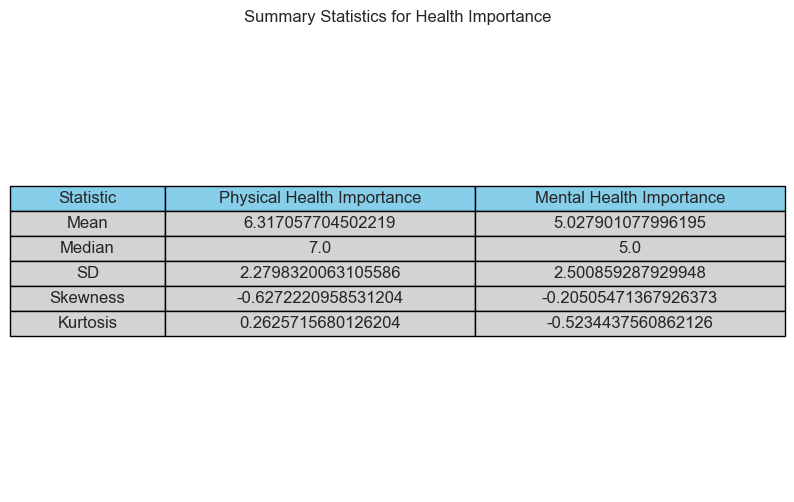

In [472]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate statistics
physical_health_mean = data_df['physical_health_importance'].mean()
physical_health_median = data_df['physical_health_importance'].median()
physical_health_std = data_df['physical_health_importance'].std()
physical_health_skew = skew(data_df['physical_health_importance'])
physical_health_kurtosis = kurtosis(data_df['physical_health_importance'])

mental_health_mean = data_df['mental_health_importance'].mean()
mental_health_median = data_df['mental_health_importance'].median()
mental_health_std = data_df['mental_health_importance'].std()
mental_health_skew = skew(data_df['mental_health_importance'])
mental_health_kurtosis = kurtosis(data_df['mental_health_importance'])

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'SD', 'Skewness', 'Kurtosis'],
    'Physical Health Importance': [physical_health_mean, physical_health_median, physical_health_std, physical_health_skew, physical_health_kurtosis],
    'Mental Health Importance': [mental_health_mean, mental_health_median, mental_health_std, mental_health_skew, mental_health_kurtosis]
})

# Convert the DataFrame to a table format
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(cellText=stats_df.values,
                 colLabels=stats_df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['skyblue']*3,
                 cellColours=[['lightgrey']*3]*5,
                 colWidths=[0.2, 0.4, 0.4])

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust cell heights
table.scale(1, 1.5)

plt.title('Summary Statistics for Health Importance')
plt.show()


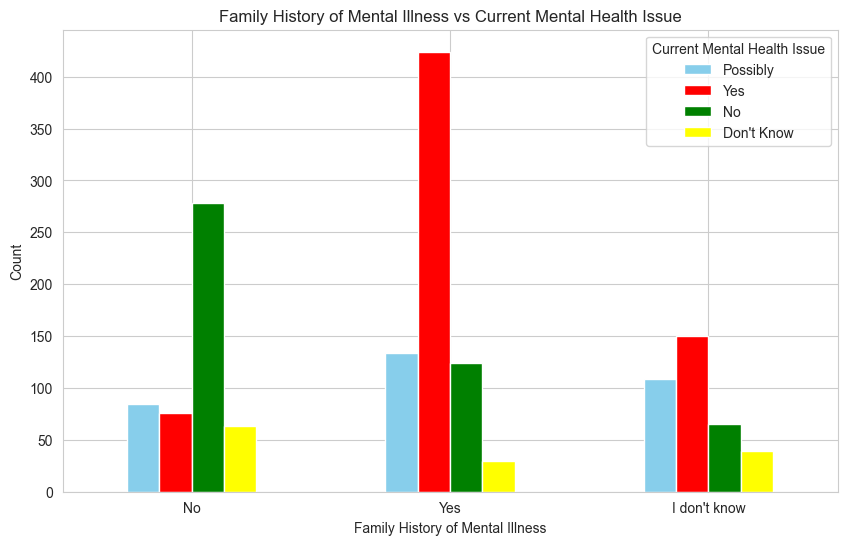

In [473]:
# Define the order of categories
order_fam_history = data_df['family history of mental illness'].unique()
order_current_mental = data_df['current_mental_health_issue'].unique()

# Create a cross-tabulation (contingency table)
cross_tab_count = pd.crosstab(
    data_df['family history of mental illness'],
    data_df['current_mental_health_issue'],
    rownames=['Family History of Mental Illness'],
    colnames=['Current Mental Health Issue'],
    dropna=False
)

# Reindex to enforce desired category order
cross_tab_count = cross_tab_count.reindex(index=order_fam_history, columns=order_current_mental, fill_value=0)

# Plot grouped bar chart
colors = ['skyblue','red','green','yellow']
cross_tab_count.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Family History of Mental Illness vs Current Mental Health Issue')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.legend(title='Current Mental Health Issue', labels=order_current_mental)
plt.xticks(rotation=0)
plt.show()

In [474]:
data_df.shape

(1577, 16)

### Feature Engineering

In [475]:
# Separate categorical and numerical features
categorical_features = data_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
# Display the lists
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['tech_company', 'tech_related_role', 'benefits', 'workplace_resources', 'mh_employer_discussion', 'mh_coworker_discussion', 'current_mental_health_issue', 'family history of mental illness', 'gender', 'country']
Numerical Features: ['physical_health_importance', 'mental_health_importance', 'treatment for a mental health', 'mh_share', 'mental_health_support', 'age']


In [476]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(data_df['current_mental_health_issue'])

In [502]:
y_label_encoded
# possibly 2
# Yes 3
# No 1
# do not know 0

array([2, 2, 3, ..., 3, 1, 3])

In [478]:
data_df['current_mental_health_issue']

0       Possibly
1       Possibly
2            Yes
3            Yes
5             No
          ...   
1827         Yes
1829          No
1831         Yes
1832          No
1835         Yes
Name: current_mental_health_issue, Length: 1577, dtype: object

In [479]:
data2 = pd.get_dummies(data_df[categorical_features], drop_first=True)
print(data2.shape)
data2.columns

(1577, 79)


Index(['tech_company_Yes', 'tech_related_role_1.0', 'benefits_No',
       'benefits_Yes', 'workplace_resources_No', 'workplace_resources_Yes',
       'mh_employer_discussion_Yes', 'mh_coworker_discussion_Yes',
       'current_mental_health_issue_No',
       'current_mental_health_issue_Possibly',
       'current_mental_health_issue_Yes',
       'family history of mental illness_No',
       'family history of mental illness_Yes', 'gender_Male', 'gender_Other',
       'country_Argentina', 'country_Australia', 'country_Austria',
       'country_Bangladesh', 'country_Belgium', 'country_Brazil',
       'country_Bulgaria', 'country_Canada', 'country_Chile', 'country_China',
       'country_Colombia', 'country_Croatia', 'country_Czech Republic',
       'country_Egypt', 'country_Estonia', 'country_Ethiopia',
       'country_Finland', 'country_France', 'country_Germany', 'country_Ghana',
       'country_Greece', 'country_Hong Kong', 'country_Hungary',
       'country_Iceland', 'country_India', 

In [480]:
from sklearn.feature_selection import chi2, SelectKBest

In [481]:
target_variable_columns = [col for col in data2.columns if col.startswith('current_mental_health_issue_')]

# Exclude columns related to the target variable
X = data2.drop(columns=target_variable_columns)  # Exclude all columns related to the target variable
y = data2[target_variable_columns]  # Target variable columns

# Applying Chi-square test on the remaining encoded features
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Creating a DataFrame for Chi-square results
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi2_scores, 'p_value': chi2_pvalues})


In [482]:
print(chi2_results)

                             Feature  Chi2_Score       p_value
0                   tech_company_Yes    1.135309  5.668533e-01
1              tech_related_role_1.0    0.107019  9.478970e-01
2                        benefits_No    8.256218  1.611332e-02
3                       benefits_Yes   30.881280  1.968862e-07
4             workplace_resources_No    1.545631  4.617113e-01
..                               ...         ...           ...
71                   country_Ukraine    5.159459  7.579449e-02
72            country_United Kingdom    3.974515  1.370708e-01
73  country_United States of America   31.793900  1.247505e-07
74                   country_Uruguay    2.293170  3.177199e-01
75                   country_Vietnam    0.916297  6.324536e-01

[76 rows x 3 columns]


In [483]:
chi2_results_sorted = chi2_results.sort_values(by='Chi2_Score', ascending=False)

# Display top features based on Chi2_Score and p_value
print(chi2_results_sorted.head(10))  # Adjust the number as per your preference

# Filter features with significant p-values (e.g., p_value < 0.05)
significant_features = chi2_results[chi2_results['p_value'] < 0.05]['Feature'].tolist()

# Print significant features
print("Significant Features:")
print(significant_features)

                                 Feature  Chi2_Score       p_value
8    family history of mental illness_No  198.971096  6.222651e-44
6             mh_employer_discussion_Yes  100.131639  1.805888e-22
9   family history of mental illness_Yes   95.170401  2.157795e-21
7             mh_coworker_discussion_Yes   83.352243  7.948596e-19
36                         country_India   36.223159  1.362200e-08
73      country_United States of America   31.793900  1.247505e-07
3                           benefits_Yes   30.881280  1.968862e-07
11                          gender_Other   13.425640  1.215232e-03
10                           gender_Male   12.726802  1.723495e-03
43                     country_Macedonia    8.369409  1.522671e-02
Significant Features:
['benefits_No', 'benefits_Yes', 'mh_employer_discussion_Yes', 'mh_coworker_discussion_Yes', 'family history of mental illness_No', 'family history of mental illness_Yes', 'gender_Male', 'gender_Other', 'country_France', 'country_Germany', 'c

In [484]:
chi2_results[chi2_results['p_value'] < 0.05]

,Feature,Chi2_Score,p_value
2,benefits_No,8.256218,1.611332e-02
3,benefits_Yes,30.881280,1.968862e-07
6,mh_employer_discussion_Yes,100.131639,1.805888e-22
7,mh_coworker_discussion_Yes,83.352243,7.948596e-19
8,family history of mental illness_No,198.971096,6.222651e-44
9,family history of mental illness_Yes,95.170401,2.157795e-21
10,gender_Male,12.726802,1.723495e-03
11,gender_Other,13.425640,1.215232e-03
29,country_France,7.690731,2.137859e-02
30,country_Germany,6.584808,3.716439e-02


In [485]:
print(chi2_results_sorted.head(20))

                                 Feature  Chi2_Score       p_value
8    family history of mental illness_No  198.971096  6.222651e-44
6             mh_employer_discussion_Yes  100.131639  1.805888e-22
9   family history of mental illness_Yes   95.170401  2.157795e-21
7             mh_coworker_discussion_Yes   83.352243  7.948596e-19
36                         country_India   36.223159  1.362200e-08
73      country_United States of America   31.793900  1.247505e-07
3                           benefits_Yes   30.881280  1.968862e-07
11                          gender_Other   13.425640  1.215232e-03
10                           gender_Male   12.726802  1.723495e-03
43                     country_Macedonia    8.369409  1.522671e-02
2                            benefits_No    8.256218  1.611332e-02
38                       country_Ireland    7.739383  2.086481e-02
29                        country_France    7.690731  2.137859e-02
32                        country_Greece    6.879511  3.207252

In [486]:
data_df[numerical_features].corr()

,physical_health_importance,mental_health_importance,treatment for a mental health,mh_share,mental_health_support,age
physical_health_importance,1.000000,0.578485,0.021615,0.146771,0.223873,-0.002651
mental_health_importance,0.578485,1.000000,0.017528,0.224437,0.387256,-0.017382
treatment for a mental health,0.021615,0.017528,1.000000,0.246533,-0.063610,0.062988
mh_share,0.146771,0.224437,0.246533,1.000000,0.147942,-0.008373
mental_health_support,0.223873,0.387256,-0.063610,0.147942,1.000000,-0.133982
age,-0.002651,-0.017382,0.062988,-0.008373,-0.133982,1.000000


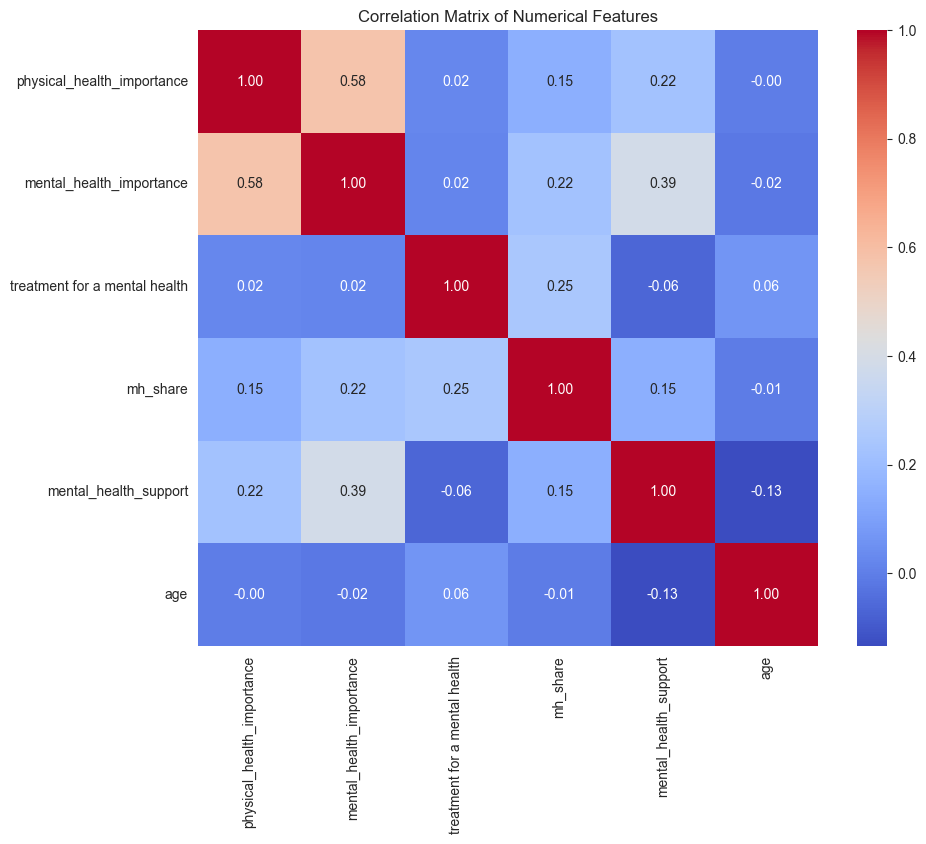

In [487]:
# Assuming numerical_features is a list of numerical column names in your dataframe
correlation_matrix = data_df[numerical_features].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [488]:
X[significant_features]

,benefits_No,benefits_Yes,mh_employer_discussion_Yes,mh_coworker_discussion_Yes,family history of mental illness_No,family history of mental illness_Yes,gender_Male,gender_Other,country_France,country_Germany,country_Greece,country_India,country_Ireland,country_Macedonia,country_Spain,country_United States of America
0,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True
3,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,True
5,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,True
1829,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1831,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
1832,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [489]:
data_df[numerical_features]

,physical_health_importance,mental_health_importance,treatment for a mental health,mh_share,mental_health_support,age
0,6.0,0.0,1,5,1.0,27.0
1,7.0,2.0,0,4,2.0,31.0
2,0.0,1.0,1,5,1.0,36.0
3,7.0,5.0,1,10,2.0,22.0
5,9.0,5.0,0,5,2.0,30.0
...,...,...,...,...,...,...
1827,5.0,4.0,1,9,4.0,35.0
1829,9.0,9.0,0,10,3.0,46.0
1831,4.0,1.0,1,6,2.0,33.0
1832,8.0,5.0,0,6,3.0,49.0


In [490]:
merged_X = pd.concat([X[significant_features], data_df[numerical_features]], axis=1)

In [491]:
merged_X

,benefits_No,benefits_Yes,mh_employer_discussion_Yes,mh_coworker_discussion_Yes,family history of mental illness_No,family history of mental illness_Yes,gender_Male,gender_Other,country_France,country_Germany,...,country_Ireland,country_Macedonia,country_Spain,country_United States of America,physical_health_importance,mental_health_importance,treatment for a mental health,mh_share,mental_health_support,age
0,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,6.0,0.0,1,5,1.0,27.0
1,False,True,False,True,True,False,True,False,False,False,...,False,False,False,False,7.0,2.0,0,4,2.0,31.0
2,False,False,True,True,False,True,True,False,False,False,...,False,False,False,True,0.0,1.0,1,5,1.0,36.0
3,False,True,True,True,False,False,True,False,False,False,...,False,False,False,True,7.0,5.0,1,10,2.0,22.0
5,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,9.0,5.0,0,5,2.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,False,True,True,True,False,False,True,False,False,False,...,False,False,False,True,5.0,4.0,1,9,4.0,35.0
1829,False,True,False,False,True,False,True,False,False,False,...,False,False,False,True,9.0,9.0,0,10,3.0,46.0
1831,True,False,False,True,False,False,True,False,False,True,...,False,False,False,False,4.0,1.0,1,6,2.0,33.0
1832,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,8.0,5.0,0,6,3.0,49.0


In [495]:
y_label_encoded

array([2, 2, 3, ..., 3, 1, 3])

In [499]:
merged_X.values

array([[True, False, False, ..., 5, 1.0, 27.0],
       [False, True, False, ..., 4, 2.0, 31.0],
       [False, False, True, ..., 5, 1.0, 36.0],
       ...,
       [True, False, False, ..., 6, 2.0, 33.0],
       [True, False, False, ..., 6, 3.0, 49.0],
       [False, False, True, ..., 6, 3.0, 38.0]], dtype=object)

#### model creation and validation

In [505]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


# Assuming X is your feature matrix and y is your target variable DataFrame
# Replace merged_X.values and y_label_encoded with your actual data
X_train, X_test, y_train, y_test = train_test_split(merged_X.values, y_label_encoded, test_size=0.2, random_state=42)

# Logistic Regression with parameter tuning
logreg_params = {'C': [0.1, 1, 10, 100], 'max_iter': [1000]}
logreg = LogisticRegression()
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
logreg_best = logreg_grid.best_estimator_

# Random Forest with parameter tuning
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Random Forest Best Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

# Support Vector Classifier with parameter tuning and scaling
svc_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train_scaled, y_train)

print("SVC Best Parameters:", svc_grid.best_params_)
svc_best = svc_grid.best_estimator_

# Evaluate models and generate reports
models = {
    'Logistic Regression': logreg_best,
    'Random Forest': rf_best,
    'Support Vector Classifier': svc_best
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy}")
    print()


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Logistic Regression Best Parameters: {'C': 1, 'max_iter': 1000}
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 300}
SVC Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        20
           1       0.64      0.64      0.64        95
           2       0.46      0.18      0.26        65
           3       0.65      0.91      0.76       136

    accuracy                           0.63       316
   macro avg       0.49      0.45      0.44       316
weighted avg       0.58      0.63      0.58       316

Accuracy Score: 0.6265822784810127

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.59      0.67      0.63        95
           2       0.33      0.06      0.10        65
           3       0.65      0.93      0.77       136

    accuracy                           0.61       316
   macro avg       0.39      0.42      0.37       316
weighted avg       0.53      0.61      0.54       316



In [504]:
accuracy_score(y_test,y_pred)

0.6265822784810127

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy Score: 0.6265822784810127
Precision: 0.5815123251165889
Recall: 0.6265822784810127
F1-score: 0.579756265323556

Model: Random Forest
Accuracy Score: 0.6265822784810127
Precision: 0.5590764364088625
Recall: 0.6265822784810127
F1-score: 0.5564379712340745

Model: Support Vector Classifier
Accuracy Score: 0.6234177215189873
Precision: 0.5587440591080673
Recall: 0.6234177215189873
F1-score: 0.5749587664451296



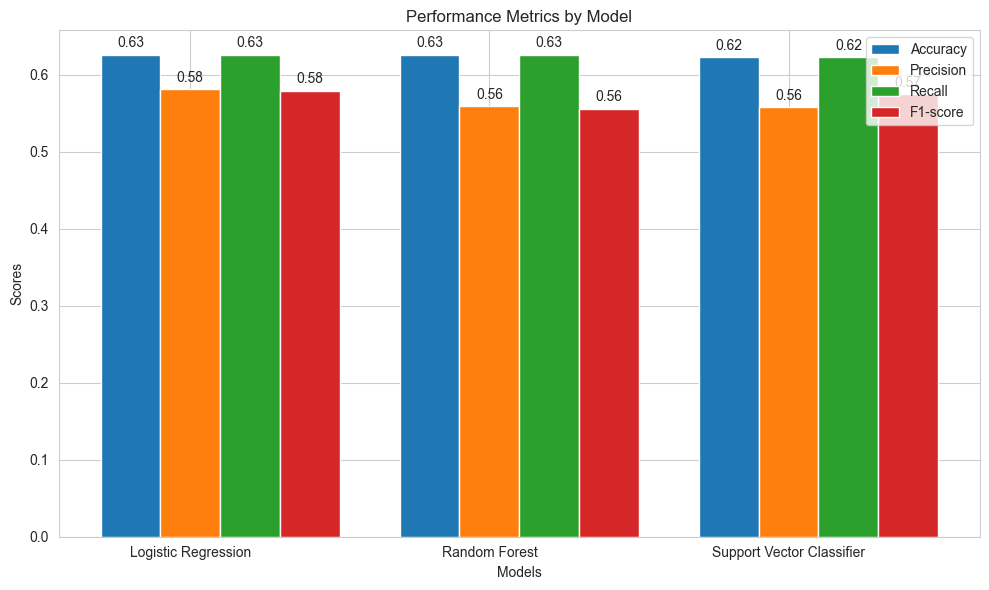

In [506]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# Initialize lists to store metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append metrics to lists
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
    # Print metrics (optional)
    print(f"Model: {name}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print()

# Plotting metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Convert lists to numpy arrays for plotting
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

# Plotting accuracy
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy')

# Plotting precision
rects2 = ax.bar(x, precisions, width, label='Precision')

# Plotting recall
rects3 = ax.bar(x + width, recalls, width, label='Recall')

# Plotting F1-score
rects4 = ax.bar(x + 2*width, f1_scores, width, label='F1-score')

# Adding labels, title, and customizing
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Function to autolabel bars with their values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call autolabel function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Show plot
plt.tight_layout()
plt.show()

In [509]:
coefficients = logreg_best.coef_
intercepts = logreg_best.intercept_

# Display coefficients and intercepts
print("Intercepts:", intercepts)
print("Coefficients:\n", coefficients)

# Get feature names (assuming merged_X is a DataFrame)
feature_names = merged_X.columns

# Display equations for each class
equations = []
for class_idx, class_label in enumerate(logreg_best.classes_):
    equation = f"Logistic Regression Equation for class '{class_label}': Logit(p_{class_label}) = {intercepts[class_idx]:.4f}"
    for i, feature in enumerate(feature_names):
        equation += f" + ({coefficients[class_idx, i]:.4f} * {feature})"
    equations.append(equation)
    print(equation)

Intercepts: [ 1.60449515 -0.66791451  1.03317201 -1.96975265]
Coefficients:
 [[-5.76036521e-01 -4.54552768e-01 -2.13243893e-01 -5.62613753e-01
   1.01001763e-02 -3.69261242e-01 -4.57490041e-02 -3.27883939e-01
   2.40125312e-01 -7.27628904e-01 -2.22797412e-01 -1.88869213e-01
  -5.42830650e-01 -5.90253166e-01  9.82055328e-01 -7.46709890e-01
  -3.87690707e-02  6.69573435e-02 -1.23278149e+00 -6.55605308e-02
   6.73349202e-02 -1.56323225e-02]
 [-1.30609868e-01 -4.02560558e-02 -2.98089095e-01 -1.38310611e-01
   9.12805695e-01  2.27998428e-01  2.34418541e-03 -2.45241365e-01
   9.81907186e-02  6.59197259e-01  8.66995012e-01  1.79284175e-01
   5.04038249e-01  7.05663633e-01  2.07627730e-01 -3.38423273e-02
  -4.36436103e-02  7.46933272e-02 -1.02045538e+00  4.69099076e-02
   6.92234707e-02  2.51565375e-02]
 [ 2.96887653e-01  5.25138511e-02 -8.81887238e-02  2.80589874e-01
  -5.19643989e-01 -2.22191929e-01  1.33781371e-01 -7.97142713e-02
  -2.87638974e-01  1.88445029e-01 -5.30316694e-01  7.60733270